## Medical Data Visualizer
### Hands on!

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Instructions
Create a chart similar to `Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

By each number in the `medical_data_visualizer.py` file, add the code from the associated instruction number below.

In [117]:
# Import the data from medical_examination.csv and assign it to the df variable.
df = pd.read_csv('medical_examination.csv')


In [118]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [119]:
# Calculate the Body Mass Index (BMI) using the formula: weight / height^2
df['BMI'] = df['weight'] / ((df['height'] / 100) **2)
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [120]:
# Normalize the data by making 0 the new 1 for cholesterol and gluc
df['cholesterol'] = df['cholesterol'].replace({1: 0, 2: 1, 3: 1})
df['gluc'] = df['gluc'].replace({1: 0, 2: 1, 3: 1})
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177


[0 1]
[0 1]


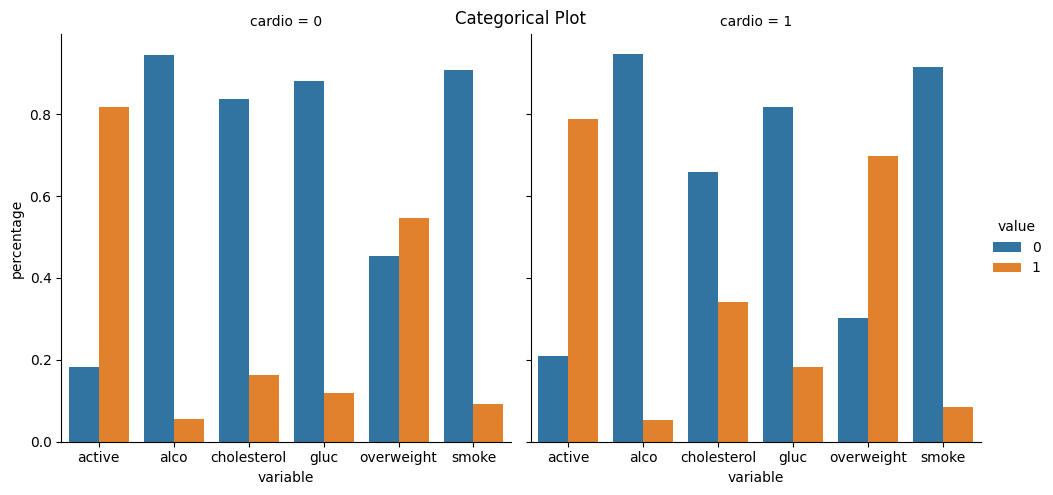

In [121]:
# Ensure the 'overweight' column is added to the DataFrame before creating the plot
if 'overweight' not in df.columns:
    df['overweight'] = (df['BMI'] > 25).astype(int)

# # Normalize the 'cholesterol' and 'gluc' columns to have only 0 and 1
# df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
# df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Check Unique Values After Normalization
print(df['cholesterol'].unique())
print(df['gluc'].unique())

# Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using only the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
    
    # Group and reformat the data to split it by 'cardio' and get the average of each feature
    df_cat = (df_cat.groupby(['cardio', 'variable'])['value']
              .value_counts(normalize=True)
              .rename('percentage')
              .reset_index())
    
    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x="variable", y="percentage", hue="value", col="cardio",
                    data=df_cat, kind="bar")
    
    # Set axis labels
    g.set_axis_labels("variable", "percentage")
    
    # Set the title
    g.fig.suptitle("Categorical Plot")
    
    return g

# Call the function to draw the plot
draw_cat_plot()

In [122]:
# Normalize the 'cholesterol' and 'gluc' columns
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Check unique values after normalization
print("Normalized cholesterol values:", df['cholesterol'].unique())
print("Normalized gluc values:", df['gluc'].unique())

Normalized cholesterol values: [1 0]
Normalized gluc values: [1 0]


In [123]:
# Group and reformat the data in df_cat to split it by cardio and get the average of each feature
df_cat = (df_cat.groupby(['cardio', 'variable'])['value']
          .value_counts(normalize=True)
          .rename('percentage')
          .reset_index())
df_cat

,cardio,variable,value,percentage
0,0,active,1,0.817881
1,0,active,0,0.182119
2,0,alco,0,0.944576
3,0,alco,1,0.055424
4,0,cholesterol,1,0.837498
5,0,cholesterol,0,0.162502
6,0,gluc,1,0.882156
7,0,gluc,0,0.117844
8,0,overweight,1,0.545558
9,0,overweight,0,0.454442


In [124]:
# Rename one of the columns for the catplot to work correctly
df_cat.rename(columns={'value': 'cholesterol'}, inplace=True)
df_cat.head()

,cardio,variable,cholesterol,percentage
0,0,active,1,0.817881
1,0,active,0,0.182119
2,0,alco,0,0.944576
3,0,alco,1,0.055424
4,0,cholesterol,1,0.837498


In [125]:
# Convert the data into long format for the catplot
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
4,0,cholesterol,1


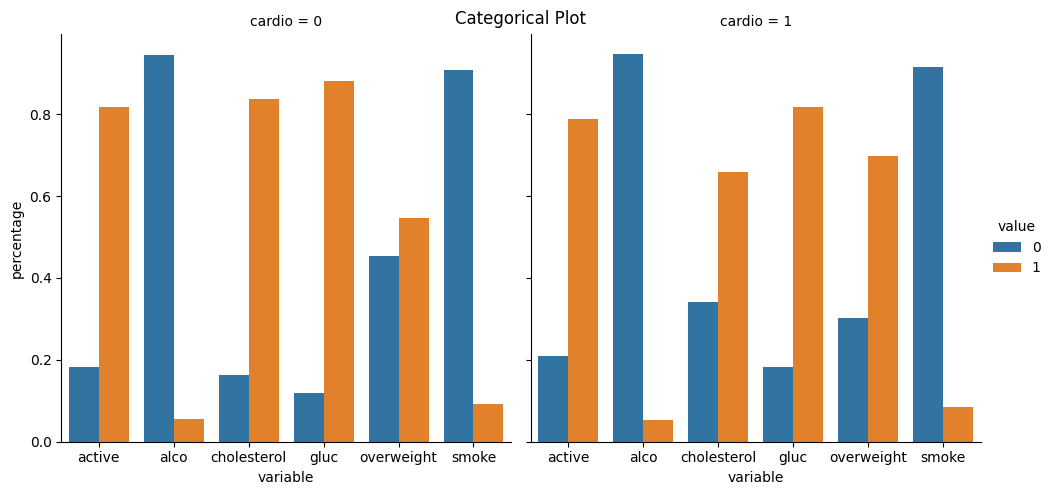

In [126]:
# Chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot()
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using only the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
    
    # Group and reformat the data to split it by 'cardio' and get the average of each feature
    df_cat = (df_cat.groupby(['cardio', 'variable'])['value']
              .value_counts(normalize=True)
              .rename('percentage')
              .reset_index())
    
    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x="variable", y="percentage", hue="value", col="cardio",
                    data=df_cat, kind="bar")
    
    # Set axis labels
    g.set_axis_labels("variable", "percentage")
    
    # Set the title
    g.fig.suptitle("Categorical Plot")
    
    return g
  
# Call the function to draw the plot
draw_cat_plot()

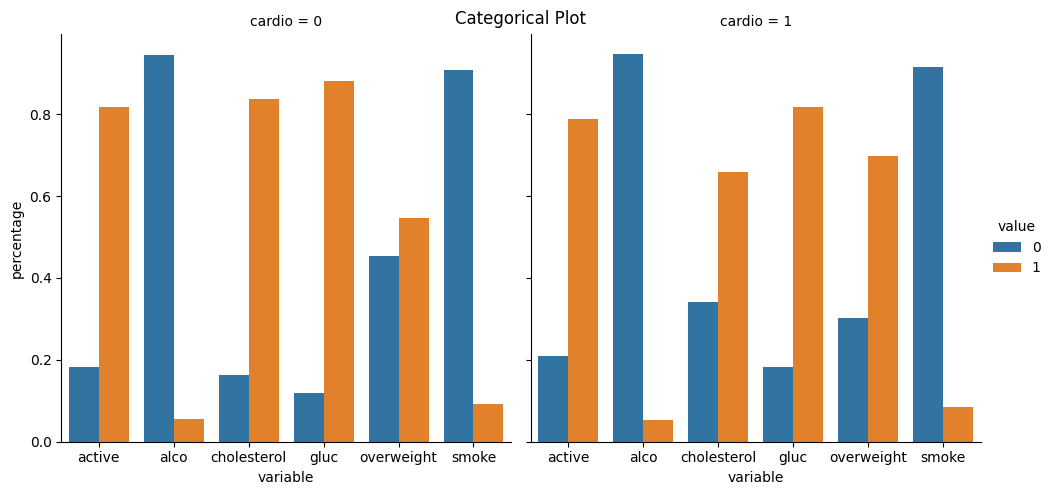

In [127]:
# Get the figure for the output and store it in the fig variable
fig = draw_cat_plot().fig
fig.savefig('catplot.png')

In [128]:
# Do not modify the next two lines
import matplotlib.pyplot as plt
import seaborn as sns

<module 'matplotlib.pyplot' from 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

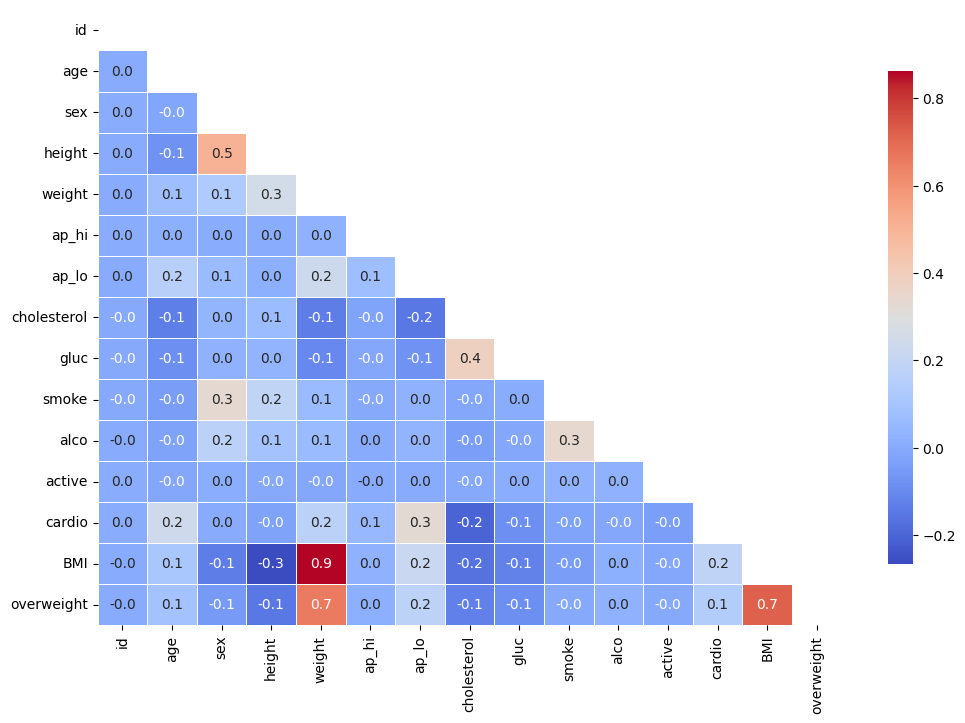

In [129]:
# Draw the heat map in the draw_heat_map function
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5, cbar_kws={"shrink": .8})
    
    return plt

# Call the function to draw the heat map  
draw_heat_map()

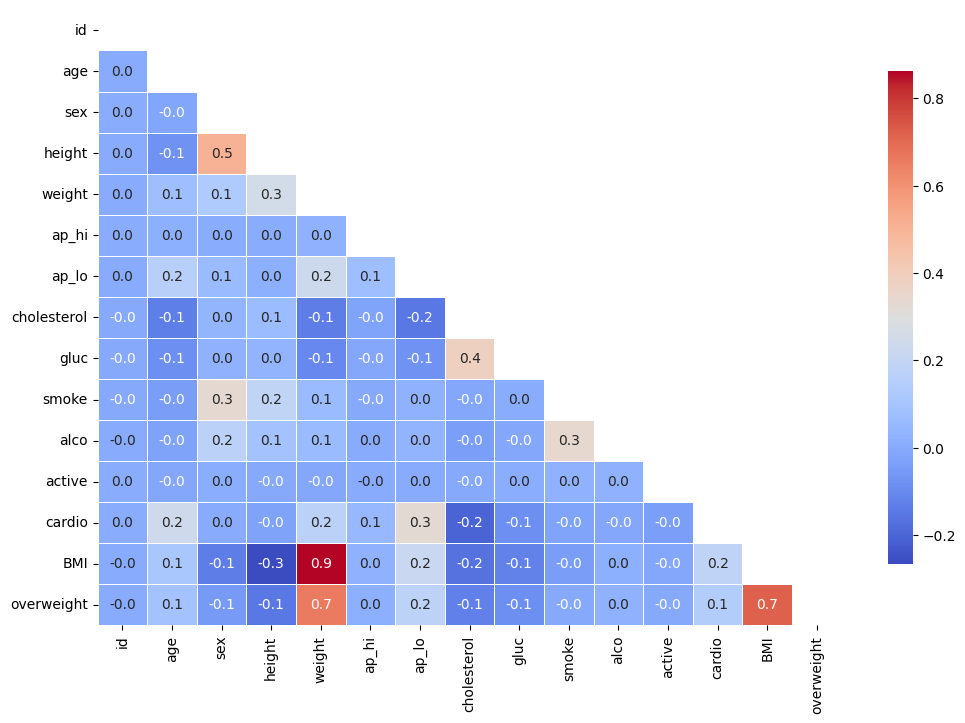

In [130]:
# Get the figure for the output and store it in the fig variable
fig = draw_heat_map()
fig.savefig('heatmap.png')

In [131]:
# Clean the data in the `df_heat` variable by filtering out the following patient segments that represent incorrect data:
# - The diastolic blood pressure (ap_lo) is greater than the systolic blood pressure (ap_hi)
# - The height is less than the 2.5th percentile or greater than the 97.5th percentile
# - The weight is less than the 2.5th percentile or greater than the 97.5th percentile
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [132]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,-0.003719,-0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000025,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,-0.129996,-0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110267,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,0.037605,0.021357,0.337436,0.168637,0.007864,0.002320,-0.135588,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,0.063522,0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.266305,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,-0.135981,-0.107072,0.056533,0.059917,-0.014430,0.170042,0.862657,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,-0.022807,-0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024925,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,-0.150362,-0.074840,0.023275,0.033042,0.001569,0.327181,0.216786,0.172212
cholesterol,-0.003719,-0.129996,0.037605,0.063522,-0.135981,-0.022807,-0.150362,1.000000,0.383743,-0.012680,-0.038446,-0.002494,-0.203467,-0.167416,-0.127986
gluc,-0.002289,-0.086990,0.021357,0.030469,-0.107072,-0.011111,-0.074840,0.383743,1.000000,0.004157,-0.014297,0.010145,-0.088445,-0.121930,-0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,-0.012680,0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041652,-0.003274


In [133]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

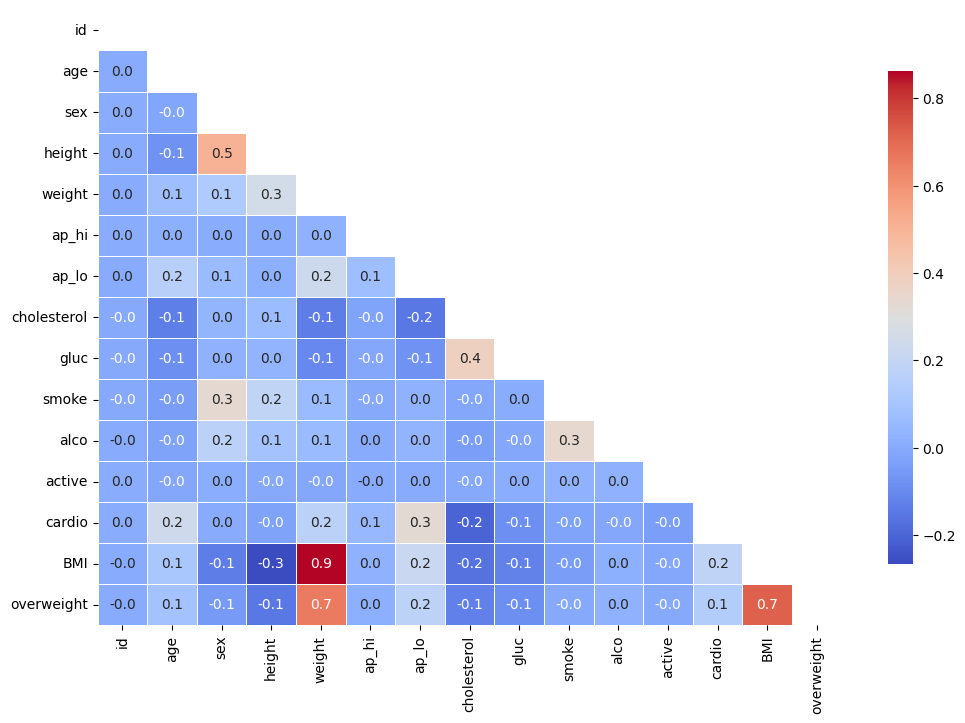

In [137]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5, cbar_kws={"shrink": .8})
plt.show()


In [138]:
# Save the heatmap figure as 'heatmap.png'
fig = plt.gcf()
fig.savefig('heatmap.png')

<Figure size 640x480 with 0 Axes>